In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("heart failure.csv")

In [5]:
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
# Data Preprocessing

In [7]:
# Null Handling

In [8]:
df = data.copy()

In [9]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [15]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
for col_name in df.columns:
    if df[col_name].nunique() > 2:
        df[col_name] = scaler.fit_transform(df[[col_name]])

In [20]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235,1


In [21]:
# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop("DEATH_EVENT",axis = 1)

In [25]:
y = df["DEATH_EVENT"]

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
# Model Selection and Training

In [30]:
from sklearn.linear_model import LogisticRegression

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
from sklearn.ensemble import  RandomForestClassifier

In [38]:
from sklearn.svm import SVC

In [40]:
import sklearn.metrics as mt

In [43]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = SVC()

In [44]:
lr.fit(xtrain, ytrain)
knn.fit(xtrain, ytrain)
dtc.fit(xtrain, ytrain)
rfc.fit(xtrain, ytrain)
svm.fit(xtrain, ytrain)

SVC()

In [46]:
y_predicted_lr = lr.predict(xtest)

In [47]:
y_predicted_knn = knn.predict(xtest)

In [48]:
y_predicted_dtc = dtc.predict(xtest)

In [49]:
y_predicted_rfc = rfc.predict(xtest)

In [51]:
y_predicted_svm = svm.predict(xtest)

In [53]:
mt.accuracy_score(ytest, y_predicted_lr)

0.7333333333333333

In [54]:
mt.accuracy_score(ytest, y_predicted_dtc)

0.6666666666666666

In [55]:
mt.accuracy_score(ytest, y_predicted_rfc)

0.7777777777777778

In [56]:
mt.accuracy_score(ytest, y_predicted_svm)

0.7111111111111111

In [57]:
mt.accuracy_score(ytest, y_predicted_knn)

0.6111111111111112

In [58]:
## Analysis

In [59]:
# Recall & Precision 

In [62]:
#Classification Report

In [63]:
print(mt.classification_report(ytest, y_predicted_lr))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81        53
           1       0.88      0.41      0.56        37

    accuracy                           0.73        90
   macro avg       0.79      0.68      0.68        90
weighted avg       0.77      0.73      0.71        90



In [64]:
print(mt.classification_report(ytest, y_predicted_knn))

              precision    recall  f1-score   support

           0       0.61      0.96      0.74        53
           1       0.67      0.11      0.19        37

    accuracy                           0.61        90
   macro avg       0.64      0.54      0.47        90
weighted avg       0.63      0.61      0.51        90



In [65]:
print(mt.classification_report(ytest, y_predicted_dtc))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        53
           1       0.62      0.49      0.55        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.64        90
weighted avg       0.66      0.67      0.66        90



In [66]:
print(mt.classification_report(ytest, y_predicted_rfc))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        53
           1       0.87      0.54      0.67        37

    accuracy                           0.78        90
   macro avg       0.81      0.74      0.75        90
weighted avg       0.80      0.78      0.76        90



In [67]:
print(mt.classification_report(ytest, y_predicted_svm))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79        53
           1       0.82      0.38      0.52        37

    accuracy                           0.71        90
   macro avg       0.75      0.66      0.66        90
weighted avg       0.74      0.71      0.68        90



In [68]:
## ROC AUC Curve

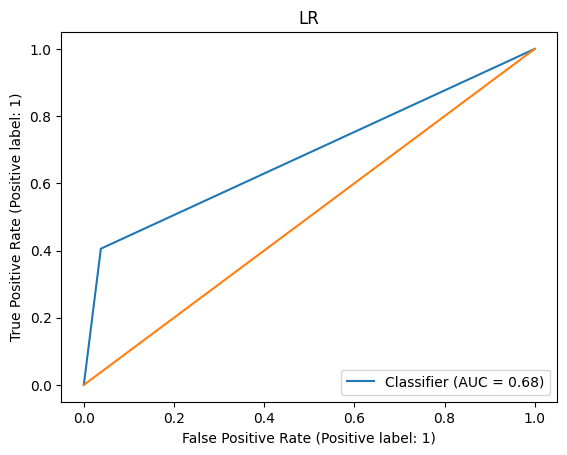

In [69]:
mt.RocCurveDisplay.from_predictions(ytest, y_predicted_lr)
plt.plot([0,1],[0,1])
plt.title("LR")
plt.show()

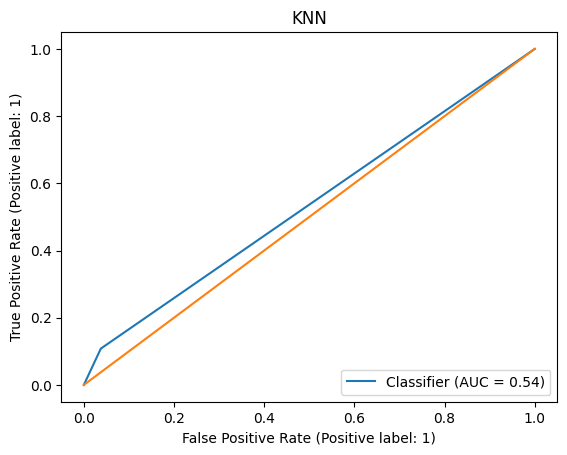

In [70]:
mt.RocCurveDisplay.from_predictions(ytest, y_predicted_knn)
plt.plot([0,1],[0,1])
plt.title("KNN")
plt.show()

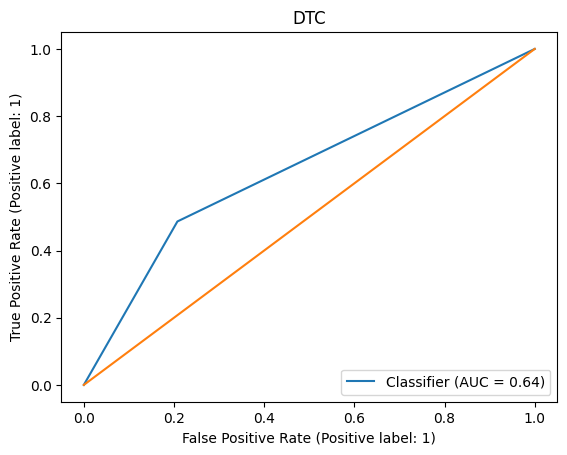

In [71]:
mt.RocCurveDisplay.from_predictions(ytest, y_predicted_dtc)
plt.plot([0,1],[0,1])
plt.title("DTC")
plt.show()

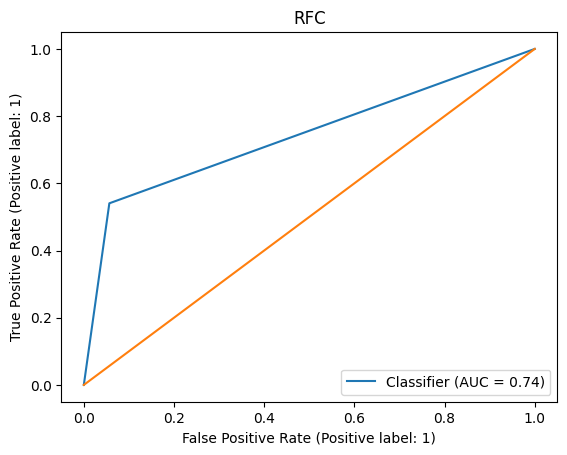

In [72]:
mt.RocCurveDisplay.from_predictions(ytest, y_predicted_rfc)
plt.plot([0,1],[0,1])
plt.title("RFC")
plt.show()

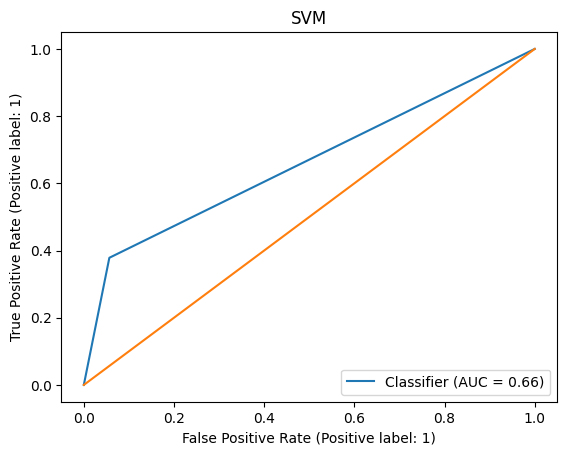

In [73]:
mt.RocCurveDisplay.from_predictions(ytest, y_predicted_svm)
plt.plot([0,1],[0,1])
plt.title("SVM")
plt.show()

In [ ]:
## Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

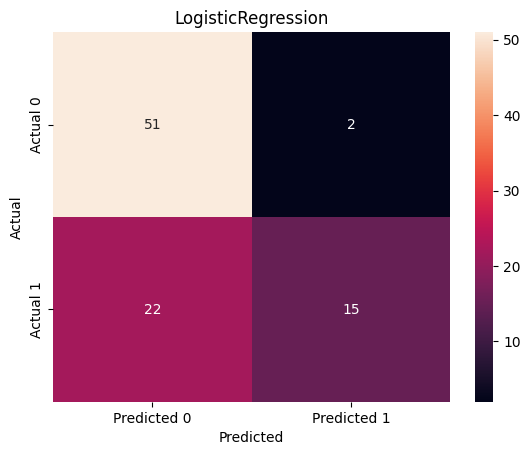

In [74]:
sns.heatmap(mt.confusion_matrix(ytest,y_predicted_lr ),annot= True,fmt="d",yticklabels=["Actual 0", "Actual 1"],xticklabels=["Predicted 0", "Predicted 1"])
plt.title("LogisticRegression")
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

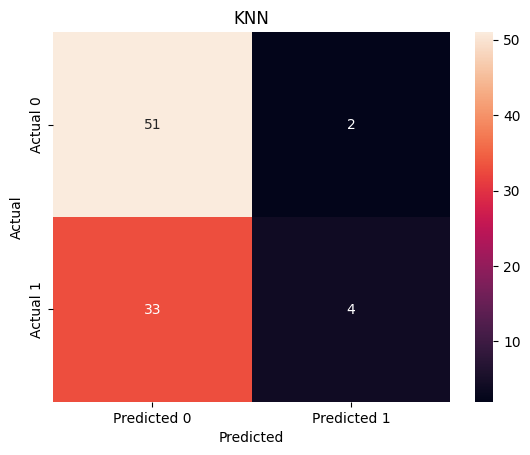

In [75]:
sns.heatmap(mt.confusion_matrix(ytest,y_predicted_knn ),annot= True,fmt="d",yticklabels=["Actual 0", "Actual 1"],xticklabels=["Predicted 0", "Predicted 1"])
plt.title("KNN")
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

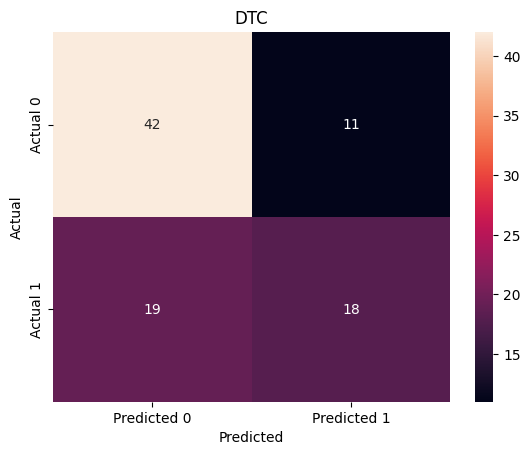

In [76]:
sns.heatmap(mt.confusion_matrix(ytest,y_predicted_dtc ),annot= True,fmt="d",yticklabels=["Actual 0", "Actual 1"],xticklabels=["Predicted 0", "Predicted 1"])
plt.title("DTC")
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

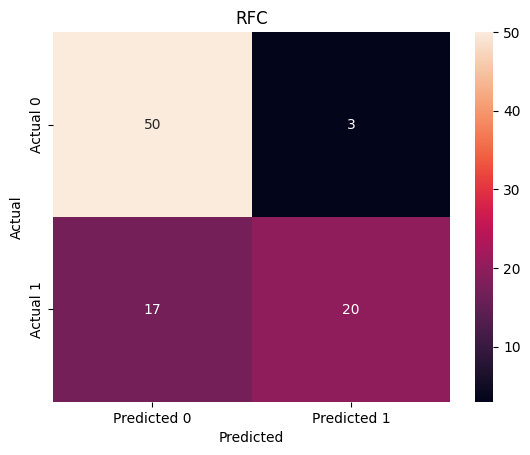

In [77]:
sns.heatmap(mt.confusion_matrix(ytest,y_predicted_rfc ),annot= True,fmt="d",yticklabels=["Actual 0", "Actual 1"],xticklabels=["Predicted 0", "Predicted 1"])
plt.title("RFC")
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

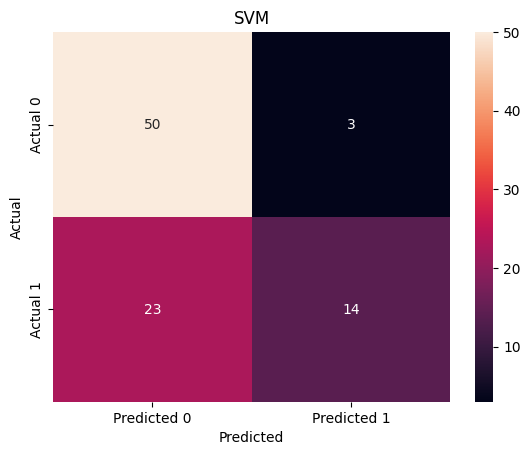

In [78]:
sns.heatmap(mt.confusion_matrix(ytest,y_predicted_svm ),annot= True,fmt="d",yticklabels=["Actual 0", "Actual 1"],xticklabels=["Predicted 0", "Predicted 1"])
plt.title("SVM")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# 